# **Rice Leaf Detection Using CNN**

# **Project Introduction:**
This dataset contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.
Classes
●	Leaf smut
●	Brown spot
●	Bacterial leaf blight

# **Classification Problem:**
Our goal is to build a model that would automatically classify rice leaf diseases. For this, we have taken three major attacking diseases in rice plants like leaf blast, bacterial blight and brown spot. We created a model that would determine if the future data inputs will fall in either of these 3 diseases- leaf,blast, bacterial blight and brown spot.

We have deviced the project into multiple steps

• Loading Data

• Preparing Dataset

• Data Preproocessing

• Model Building

• Trining

• Check

In [131]:
#importing required libraries
import numpy as np
import cv2   #converts image into arrays
import os 
import random 
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from glob import glob

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
#loading data
data = '/content/drive/MyDrive/Colab Notebooks/Untitled Folder'
categories=os.listdir(data)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)  

{'Leaf smut': 0, 'Bacterial leaf blight': 1, 'Brown spot': 2}
['Leaf smut', 'Bacterial leaf blight', 'Brown spot']
[0, 1, 2]


In [134]:
print("The number of images of bacterial leaf blight:",len(os.listdir('/content/drive/MyDrive/Colab Notebooks/Untitled Folder/Bacterial leaf blight')))
print("The number of images of Brown spot:",len(os.listdir('/content/drive/MyDrive/Colab Notebooks/Untitled Folder/Brown spot')))
print("The number of images of Leaf smut:",len(os.listdir('/content/drive/MyDrive/Colab Notebooks/Untitled Folder/Leaf smut')))

The number of images of bacterial leaf blight: 41
The number of images of Brown spot: 51
The number of images of Leaf smut: 39


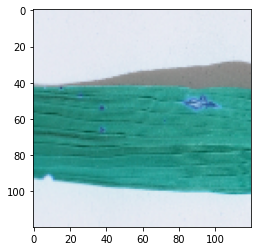

In [161]:
IMG_SIZE=120
for category in categories:
  folder=os.path.join(data,category)
  for img in os.listdir(folder): #this list dir will list all the files that are present in the folder
       img_path=os.path.join(folder,img)
       img_arr=cv2.imread(img_path)    
       img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE)) ##cv2 converts image into array
       plt.imshow(img_arr)

In [162]:
disease=[]
for category in categories:
  folder=os.path.join(data,category)
  label=categories.index(category)
  for img in os.listdir(folder): #this list dir will list all the files that are present in the folder
       img_path=os.path.join(folder,img)
       img_arr=cv2.imread(img_path)    #cv2 converts image into array
       img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
       disease.append([img_arr,label])

In [163]:
disease

[[array([[[231, 233, 243],
          [228, 233, 242],
          [230, 232, 242],
          ...,
          [211, 219, 236],
          [208, 215, 234],
          [209, 216, 235]],
  
         [[227, 233, 240],
          [227, 232, 241],
          [226, 231, 242],
          ...,
          [210, 218, 235],
          [209, 216, 235],
          [210, 217, 236]],
  
         [[230, 232, 242],
          [225, 232, 241],
          [225, 230, 239],
          ...,
          [210, 217, 236],
          [211, 218, 237],
          [206, 216, 234]],
  
         ...,
  
         [[227, 234, 243],
          [228, 234, 241],
          [226, 233, 241],
          ...,
          [212, 220, 237],
          [209, 219, 237],
          [212, 219, 238]],
  
         [[228, 234, 241],
          [228, 234, 241],
          [226, 233, 242],
          ...,
          [212, 220, 235],
          [211, 219, 236],
          [210, 218, 235]],
  
         [[230, 233, 242],
          [228, 234, 241],
          [228, 233, 242

In [164]:
#getting Features and class
X = []
Y = []
for features, labels in disease:
  X.append(features)
  Y.append(labels)

In [165]:
#converting list to an array
X = np.array(X)
Y = np.array(Y)

In [166]:
X.shape

(131, 120, 120, 3)

In [167]:
#splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=36)

In [168]:
#creating CNN architecture
tf.random.set_seed(32)
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Activation,MaxPooling2D,Dropout,BatchNormalization
from keras.optimizers import SGD
model = Sequential()


model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(120,120,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(120,120,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(120,120,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(100,activation='relu')) # input node
model.add(Dense(100,activation='relu')) # hiddeen
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax')) #output node

In [169]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 117, 117, 32)      1568      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 58, 58, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 55, 55, 32)        16416     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 27, 27, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        16416     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 32)      

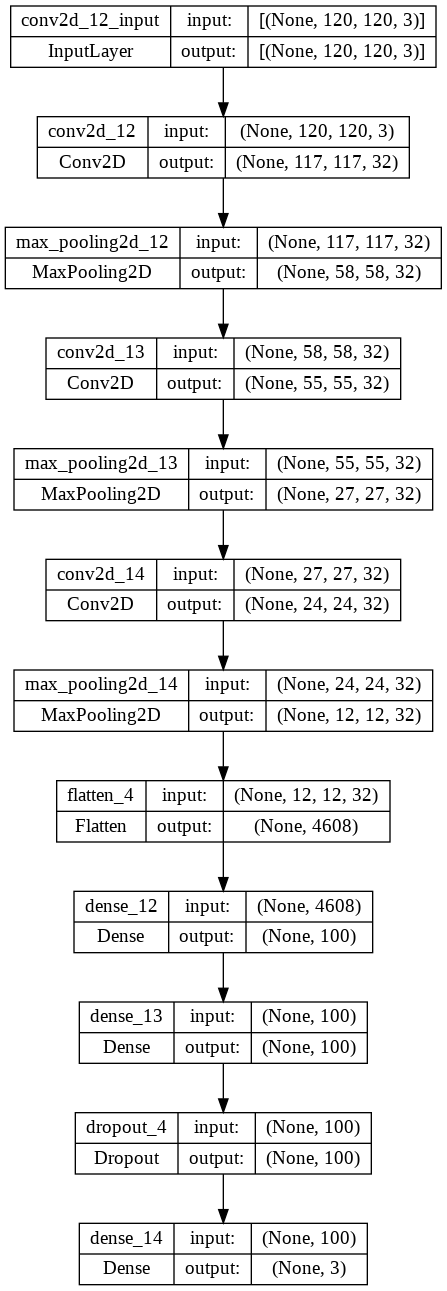

In [170]:
#Architecture figure
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='simple_cnn.png', show_shapes=True, show_layer_names=True)

In [171]:
#Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

In [172]:
#Callback
import keras
callback= keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
) 

In [173]:
#Preprocessing Scale image
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [174]:
from tensorflow.keras.utils import to_categorical

In [175]:
y_categorical_train = to_categorical(Y_train,3)

In [176]:
  y_cat_test = to_categorical(Y_test,3)

In [177]:
#defining labels
class_labels = ['Bacterial leaf blight','Brown spot','Leaf smut']

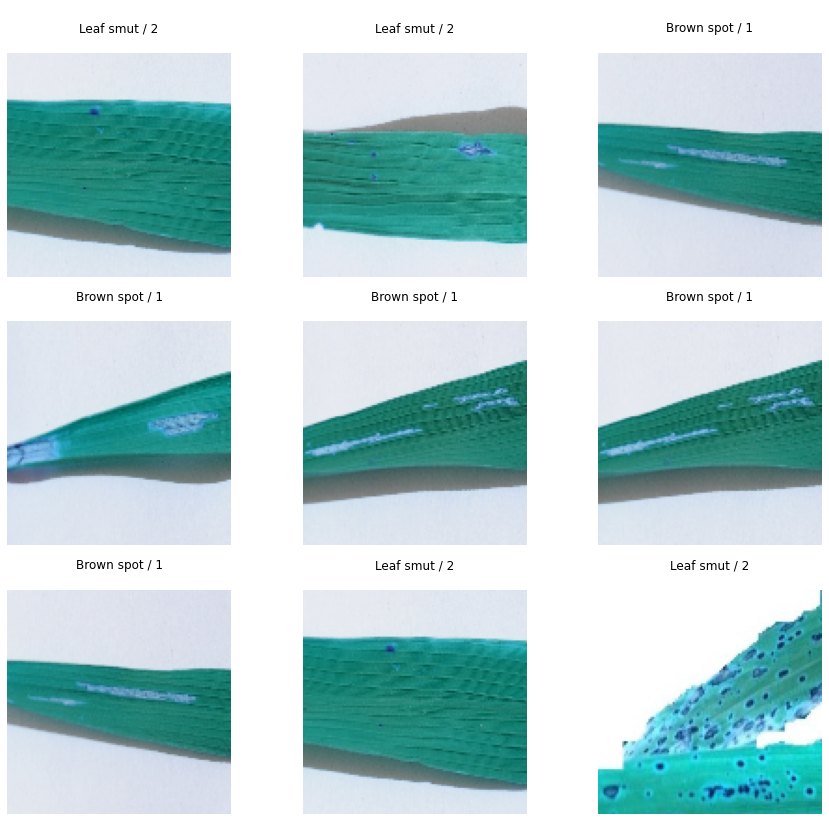

In [178]:
#plotting Images
plt.figure(figsize=(15,14))
j=1
for i in np.random.randint(0,8,9):
  plt.subplot(3,3,j);j+=1
  plt.imshow(X_train_scaled[i])
  plt.axis("off")
  plt.title('\n{} / {}\n'.format(class_labels[np.argmax(y_categorical_train[i])],np.argmax(y_categorical_train[i])))

# **Image Augmentation**

In [179]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(X_train_scaled)

In [180]:
r=model.fit_generator(datagen.flow(X_train_scaled,y_categorical_train, batch_size = 1),
                    steps_per_epoch = len(X_train_scaled) / 1, # number of samples per gradient update
                    epochs = 80, # number of iterations
                    validation_data= (X_test_scaled,y_cat_test),
                    callbacks=[callback],
                    verbose=10,shuffle=False)

Epoch 1/80
Epoch 2/80
Epoch 3/80
Epoch 4/80
Epoch 5/80
Epoch 6/80
Epoch 7/80
Epoch 8/80
Epoch 9/80
Epoch 10/80
Epoch 11/80
Epoch 12/80
Epoch 13/80
Epoch 14/80
Epoch 15/80
Epoch 16/80
Epoch 17/80
Epoch 18/80
Epoch 19/80
Epoch 20/80
Epoch 21/80
Epoch 22/80
Epoch 23/80
Epoch 24/80
Epoch 25/80
Epoch 26/80
Epoch 27/80
Epoch 28/80
Epoch 29/80
Epoch 30/80
Epoch 31/80
Epoch 32/80
Epoch 33/80
Epoch 34/80
Epoch 35/80
Epoch 36/80
Epoch 37/80
Epoch 38/80
Epoch 39/80
Epoch 40/80
Epoch 41/80
Epoch 42/80
Epoch 43/80
Epoch 44/80


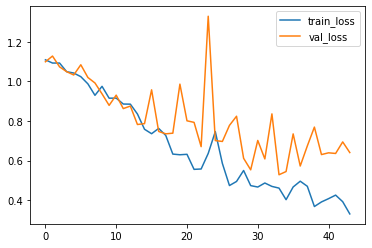

In [181]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

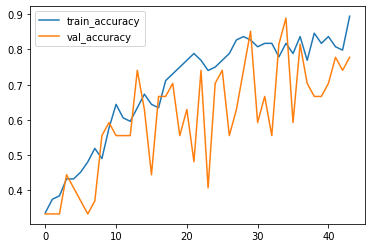

In [182]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [183]:
model.evaluate(X_test_scaled,y_cat_test)

1/1 [==============================] - 0s 187ms/step - loss: 0.6405 - accuracy: 0.7778


[0.6405369639396667, 0.7777777910232544]

In [184]:
from sklearn.metrics import classification_report
predictions = np.argmax(model.predict(X_test_scaled), axis=-1)
print(classification_report(Y_test,predictions))

1/1 [==============================] - 0s 243ms/step
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      0.64      0.78        11
           2       0.70      0.78      0.74         9

    accuracy                           0.78        27
   macro avg       0.80      0.80      0.78        27
weighted avg       0.82      0.78      0.78        27



In [185]:
print(f"Predicted Class : {predictions}\n")
print(f"Test Images Class : {Y_test}")

Predicted Class : [2 2 2 0 0 0 2 1 1 1 2 0 2 2 1 0 0 2 1 1 0 1 0 2 0 0 2]

Test Images Class : [2 2 2 2 0 0 2 1 1 1 2 0 1 1 1 0 2 1 1 1 0 1 0 2 0 1 2]


In [186]:
from keras.models import load_model
#model3 = load_model('riceleaf_79')

<Figure size 432x288 with 0 Axes>

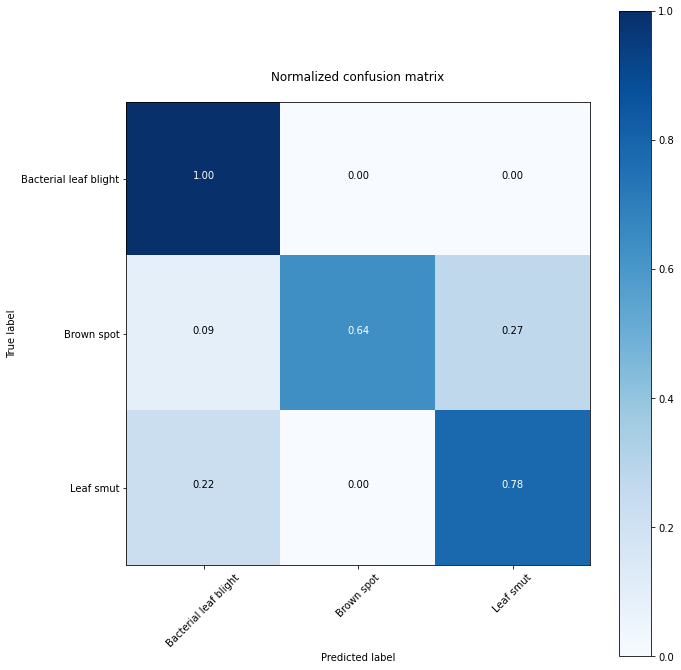

In [187]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, predictions)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, title='Normalized confusion matrix\n')
plt.show()

# **Conclusion**
Based on the given objectives the dataset has been analysed,the model has been built and the results have been predicted with the test data.The CNN Machine learning model has been fitted and predicted with high accuracy.Also, we observed that by adjusting the training parameters like learning rate, number of epochs, and optimizer methods, we can get significant accuracy with a handmade model having less number of layers than the other traditional models. The better we can detect infections, the simpler it will be for farmers to protect their crops. In the future, we will broaden the scope to include more diseases and algorithms, making disease detection vast, easier and faster.